In [1]:
%%time
%run theory_basics.ipynb

CPU times: user 5min 53s, sys: 15min 19s, total: 21min 12s
Wall time: 2min 23s


In [2]:
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)

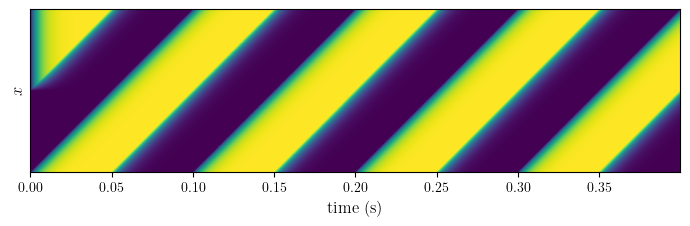

In [3]:
%matplotlib inline
plt.figure(figsize=(7, 3))
data = X_full[:2000].T
t_data = t[:2000]
plt.imshow(data, vmax=data.max(), vmin=data.min(),
           extent=[t_data[0], t_data[-1], N/len(data.T)*(t_data[-1]-t_data[0]), 0])
plt.yticks([])
plt.ylabel('$x$', fontsize=12)
plt.xlabel("time (s)", fontsize=12)
plt.tight_layout()
#plt.savefig('../latex/images/basic_activity.pdf', bbox_inches='tight')

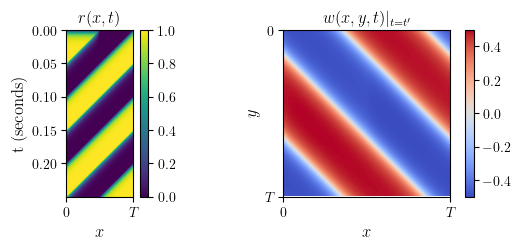

In [21]:
%matplotlib inline
data = X_full[:int(2.5*N)]
t_data = t[:int(2.5*N)]

plt.figure(figsize=(5.5, 2.6))

# First heatmap
ax1 = plt.subplot(1, 3, 1)
heatmap1 = plt.imshow(data, vmax=1, vmin=0,
                      extent=[0, T, t_data[-1], t_data[0]])
plt.xticks([0, T], [r'$0$', r'$T$'])
plt.xlabel('$x$', fontsize=12)
plt.ylabel(r"$\textrm{t (seconds)}$", fontsize=12)
plt.title('$r(x, t)$')
plt.colorbar(heatmap1, ax=ax1, orientation='vertical')  # Colorbar for the first heatmap
#plt.tight_layout()

# Second heatmap
ax2 = plt.subplot(1, 3, (2, 3))
heatmap2 = plt.imshow(w_full.T, cmap='coolwarm')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.title(r"$w(x, y, t)|_{t=t'}$")
plt.xticks([0, N], [r'$0$', r'$T$'])
plt.yticks([0, N], [r'$0$', r'$T$'])
plt.colorbar(heatmap2, ax=ax2, orientation='vertical')  # Colorbar for the second heatmap
plt.tight_layout()
#plt.subplots_adjust(left=0.05)
plt.savefig('../latex/images/basic_activity_with_weights.pdf', bbox_inches='tight')

In [5]:
def plot_activity(X, t, bins=20, cutoff_div=None):
    if cutoff_div is not None:
        data = np.array_split(
            np.concatenate([X[: len(X) // cutoff_div + 2], X[-len(X) // cutoff_div :]]),
            bins,
            axis=0,
        )
        t_data = np.array_split(
            np.concatenate([t[:len(X) // cutoff_div + 2], t[-len(X) // cutoff_div :]]),
            bins
        )
    else:
        data = np.array_split(X, bins, axis=0)
        t_data = np.array_split(t, bins)

    # Create a figure with subplots
    fig, axs = plt.subplots(1, bins, figsize=(12, 4), sharey=False)

    # Iterate over the subplots and plot the corresponding data
    for i, ax in enumerate(axs):
        ax.imshow(data[i][::], vmax=X.max(), vmin=X.min(),
                  #extent=[0, 20, 2*N, 0])
                  extent=[0, N/len(data[i])*(t_data[i][-1]-t_data[i][0]), t_data[i][-1], t_data[i][0]])
        ax.set_xticks([])
        ax.set_xlabel('$x$')
    axs[0].set_ylabel("time (s)", fontsize=15)
    plt.subplots_adjust(wspace=-0.2)
    plt.tight_layout()
    plt.show()

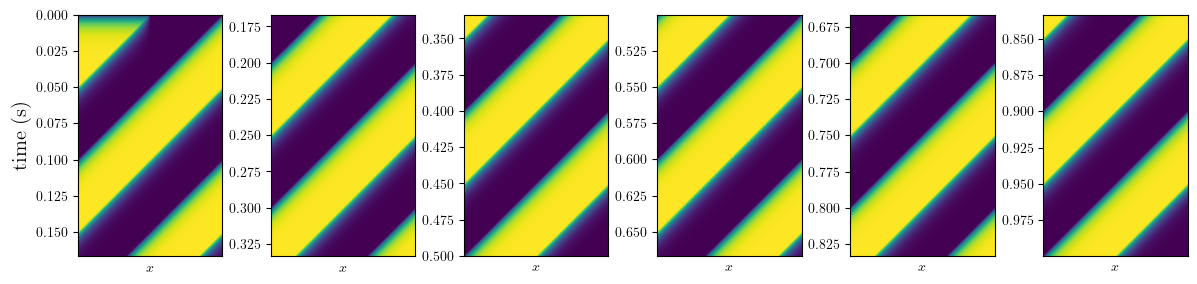

In [6]:
plot_activity(X_full[:10*N], t[:10*N], bins=6)

# Weight Symmetry

We observe a periodicity of network activity and synaptic weights.

In [7]:
def symmetrize(A, mod):
    return np.array(
        [np.roll(row, -round(N * i / mod % mod)) for i, row in enumerate(A)]
    )

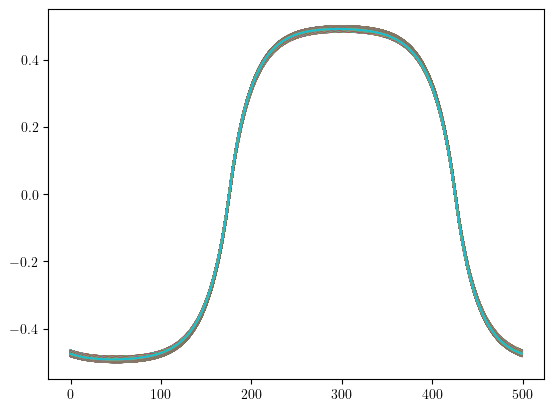

In [8]:
plt.plot(symmetrize(w_full.T, N).T);

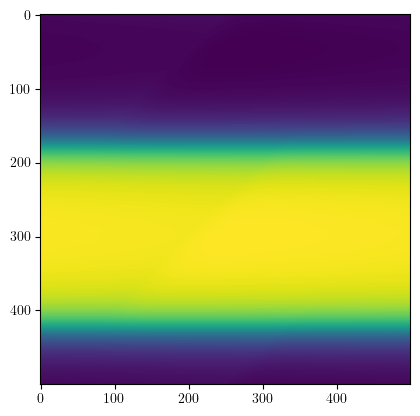

In [9]:
plt.imshow(symmetrize(w_full.T, N).T);

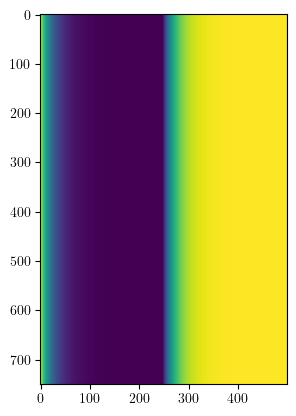

In [10]:
plt.imshow(symmetrize(X_full[-round(1.5 * N) :], -N));

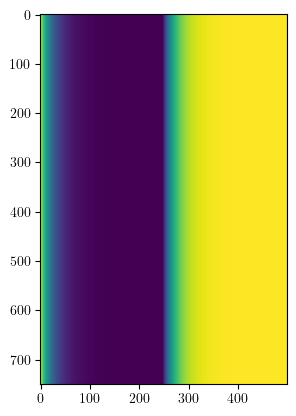

In [11]:
plt.imshow(symmetrize(X[-round(1.5 * N) :], -N));

/tmp/ipykernel_17151/2657124287.py:50: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


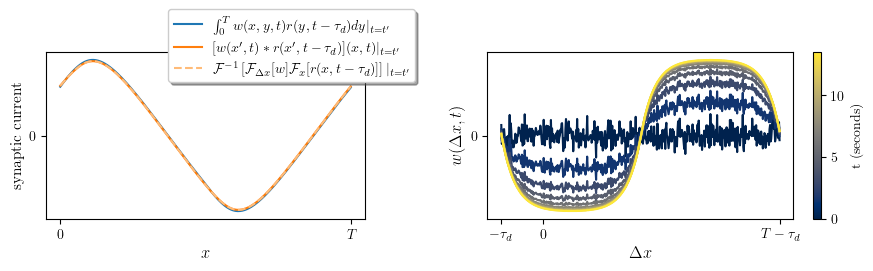

In [18]:
plt.figure(figsize=(8.9, 3.0))
plt.subplot(1, 14, (1, 6))
i_ = 30*N-35

num_lines = 3

# Get the tab20 colormap
tab20 = matplotlib.colormaps.get_cmap('tab20')

w_ = symmetrize(w_full.T, N+1).mean(0)

plt.plot(
    f_I_matrix_multiply(w_full, X_full[i_ - delay_i]),
    label=r"$\int_0^T w(x, y, t) r(y, t - \tau_d) dy|_{t=t'}$",
    color=tab20(0)
)
plt.plot(
    f_I_conv_circ(w_, X_full[i_ - delay_i]),
    label=r"$[w(x', t) * r(x', t - \tau_d)](x, t)|_{t=t'}$",
    color=tab20(2)
)
plt.plot(
    f_I_conv_circ_fft(w_, X_full[i_ - delay_i]),
    linestyle="dashed",
    label=r"$\mathcal{F}^{-1}\left[\mathcal{F}_{\Delta x}[w]\mathcal{F}_x[r(x, t-\tau_d)]\right]|_{t=t'}$",
    color=tab20(3)
)

#plt.ylabel(r"$\frac{\partial}{\partial t} r(x, t)|_{t=t'}$")
plt.xlabel('$x$', fontsize=12)
plt.xticks([0, N], [r'$0$', r'$T$'])
plt.yticks([0])
plt.ylabel('synaptic current', fontsize=11)
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.77, 1.3), fancybox=True, shadow=True)

plt.subplot(1, 14, (8, 14))
data = np.roll(W[::7500], delay_i, axis=1)
colors = plt.cm.cividis(np.linspace(0, 1, len(data)))
for i in range(len(data)):
    plt.plot(data[i], color=colors[i])
ax = plt.gca()
sm = plt.cm.ScalarMappable(cmap=plt.cm.cividis, norm=plt.Normalize(vmin=0, vmax=t[::7500][-1]))
plt.xticks([0, delay_i, N], [r'$-\tau_d$', 0, r'$T-\tau_d$'])
plt.yticks([0])
plt.xlabel('$\Delta x$', fontsize=12)
plt.ylabel(r"$w(\Delta x, t)$", fontsize=12)
#plt.title(r"weight evolution", fontsize=14)
plt.colorbar(sm, ax=ax, label=r"$\textrm{t (seconds)}$")
plt.tight_layout()
plt.savefig('../latex/images/weight_kernel_estimate_and_evolution.pdf', bbox_inches='tight')

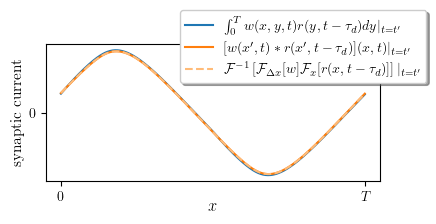

In [13]:
plt.figure(figsize=(4, 2))
i_ = 30*N-70

num_lines = 3

# Get the tab20 colormap
tab20 = matplotlib.colormaps.get_cmap('tab20')

w_ = symmetrize(w_full.T, N+1).mean(0)

plt.plot(
    f_I_matrix_multiply(w_full, X_full[i_ - delay_i]),
    label=r"$\int_0^T w(x, y, t) r(y, t - \tau_d) dy|_{t=t'}$",
    color=tab20(0)
)
plt.plot(
    f_I_conv_circ(w_, X_full[i_ - delay_i]),
    label=r"$[w(x', t) * r(x', t - \tau_d)](x, t)|_{t=t'}$",
    color=tab20(2)
)
plt.plot(
    f_I_conv_circ_fft(w_, X_full[i_ - delay_i]),
    linestyle="dashed",
    label=r"$\mathcal{F}^{-1}\left[\mathcal{F}_{\Delta x}[w]\mathcal{F}_x[r(x, t-\tau_d)]\right]|_{t=t'}$",
    color=tab20(3)
)

#plt.ylabel(r"$\frac{\partial}{\partial t} r(x, t)|_{t=t'}$")
plt.xlabel('$x$', fontsize=12, labelpad=-3)
plt.xticks([0, N], [r'$0$', r'$T$'])
plt.yticks([0])
plt.ylabel('synaptic current', fontsize=11)
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.77, 1.3), fancybox=True, shadow=True)
plt.savefig('../latex/images/weight_kernel_estimate.pdf', bbox_inches='tight')

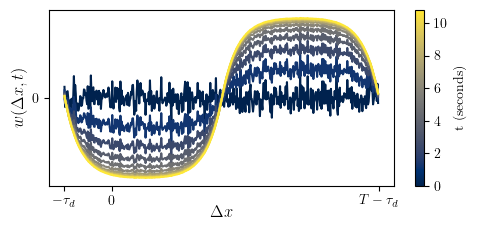

In [19]:
plt.figure(figsize=(5, 2.4))
data = np.roll(W[:60000:6000], delay_i, axis=1)
colors = plt.cm.cividis(np.linspace(0, 1, len(data)))
for i in range(len(data)):
    plt.plot(data[i], color=colors[i])
ax = plt.gca()
sm = plt.cm.ScalarMappable(cmap=plt.cm.cividis, norm=plt.Normalize(vmin=0, vmax=t[:60000:6000][-1]))
plt.xticks([0, delay_i, N], [r'$-\tau_d$', 0, r'$T-\tau_d$'])
plt.yticks([0])
plt.xlabel('$\Delta x$', fontsize=12, labelpad=-2)
plt.ylabel(r"$w(\Delta x, t)$", fontsize=12)
#plt.title(r"weight evolution", fontsize=14)
plt.colorbar(sm, ax=ax, label=r"$\textrm{t (seconds)}$")
plt.tight_layout()
plt.savefig('../latex/images/weight_kernel_evolution.pdf', bbox_inches='tight')

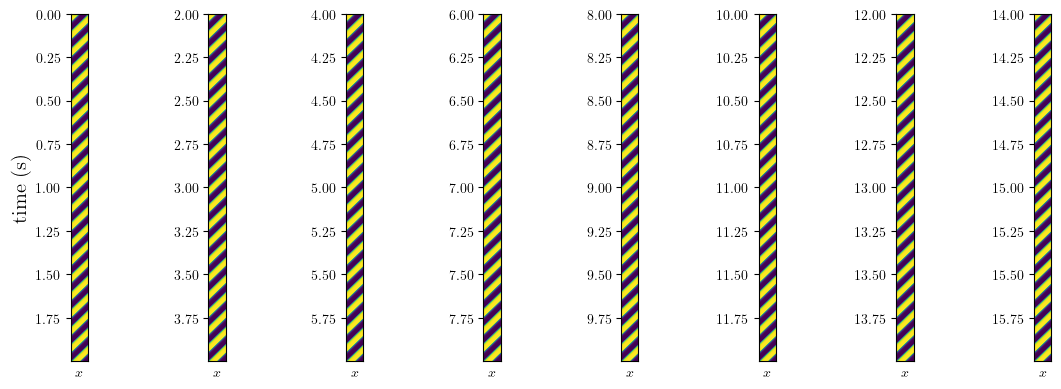

In [15]:
plot_activity(X, t, bins=8)

In [16]:
X[-1000:].max(), X[-1000:].min()

(0.9999630348727263, 3.69651272737056e-05)